<a href="https://colab.research.google.com/github/parshadk/DataMiningAndBusinessIntelligence/blob/main/DMBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# DMBI

# Loading data with pandas

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('./fraud_dataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


# Data Cleaning and preprocessing

Check for Missing Values:

In [25]:
missing_values = df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


Drop missing values

In [26]:
df_cleaned = df.dropna()
print(df_cleaned.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [34]:
df.fillna(0, inplace=True)


#  EDA - Descriptive Statistics


In [28]:
summary_statistics = df.describe()
print(summary_statistics)

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

### mean ,median


In [29]:
mean_values = df.mean(numeric_only=True)

print("Mean Values:\n", mean_values)

Mean Values:
 step              2.433972e+02
amount            1.798619e+05
oldbalanceOrg     8.338831e+05
newbalanceOrig    8.551137e+05
oldbalanceDest    1.100702e+06
newbalanceDest    1.224996e+06
isFraud           1.290820e-03
isFlaggedFraud    2.514687e-06
dtype: float64


In [30]:

median_values = df.median(numeric_only=True)
print("Median Values:\n", median_values)

Median Values:
 step                 239.000
amount             74871.940
oldbalanceOrg      14208.000
newbalanceOrig         0.000
oldbalanceDest    132705.665
newbalanceDest    214661.440
isFraud                0.000
isFlaggedFraud         0.000
dtype: float64


In [31]:

std_values = df.std(numeric_only=True)

print("Standard Deviation Values:\n", std_values)

Standard Deviation Values:
 step              1.423320e+02
amount            6.038582e+05
oldbalanceOrg     2.888243e+06
newbalanceOrig    2.924049e+06
oldbalanceDest    3.399180e+06
newbalanceDest    3.674129e+06
isFraud           3.590480e-02
isFlaggedFraud    1.585775e-03
dtype: float64


### Identify Categorical Columns:

In [32]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)

Categorical Columns:
 Index(['type', 'nameOrig', 'nameDest'], dtype='object')


### Create Frequency Tables

In [33]:
frequency_tables = {col: df[col].value_counts() for col in categorical_columns}

for col, freq_table in frequency_tables.items():
    print(f"Frequency Table for {col}:\n{freq_table}\n")


Frequency Table for type:
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Frequency Table for nameOrig:
nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
              ..
C1567523029    1
C644777639     1
C1256645416    1
C1231536757    1
C1971151096    1
Name: count, Length: 6353307, dtype: int64

Frequency Table for nameDest:
nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M367627425       1
M1902904124      1
M242332837       1
M281573812       1
M1010678443      1
Name: count, Length: 2722362, dtype: int64



# Data Visualization with Matplotlib and Seaborn

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

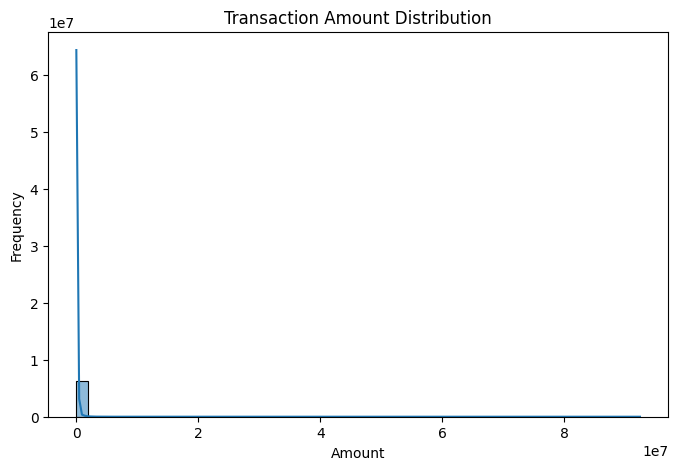

In [40]:

plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


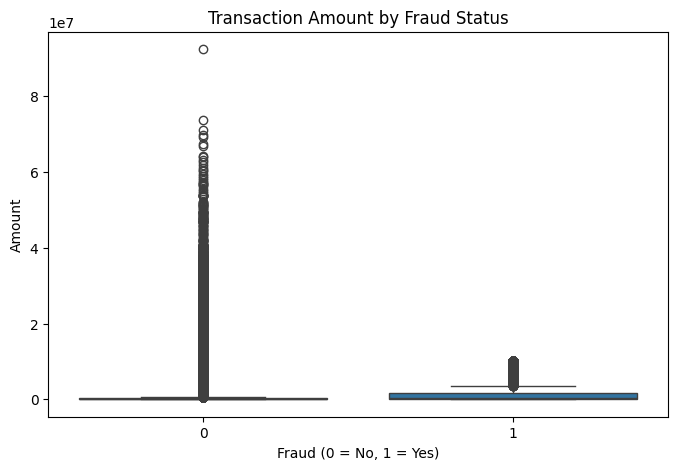

In [41]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['isFraud'], y=df['amount'])
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Fraud (0 = No, 1 = Yes)')
plt.ylabel('Amount')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


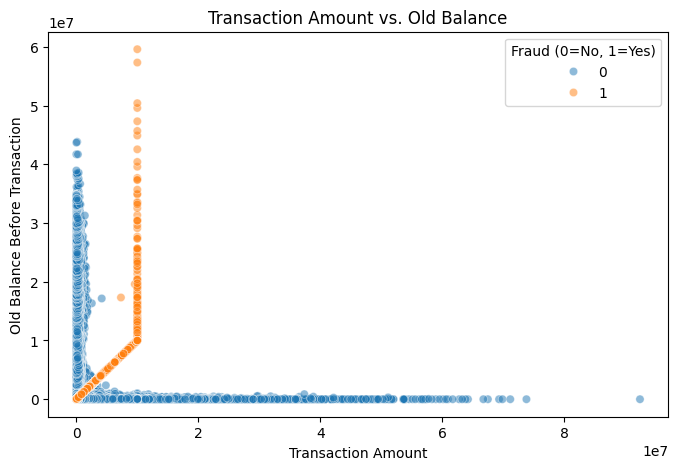

In [42]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['amount'], y=df['oldbalanceOrg'], hue=df['isFraud'], alpha=0.5)
plt.title('Transaction Amount vs. Old Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Old Balance Before Transaction')
plt.legend(title='Fraud (0=No, 1=Yes)')
plt.show()


# Correlation Analysis

In [43]:

correlation_matrix = df.corr(numeric_only=True)

print(correlation_matrix)


                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.022373      -0.010058       -0.010299   
amount          0.022373  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.459304       0.042029        0.041837   
isFraud         0.031578  0.076688       0.010154       -0.008148   
isFlaggedFraud  0.003277  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                  0.027665        0.025888  0.031578        0.003277  
amount                0.294137        0.459304  0.076688        0.012295  
oldbalanceOrg         0.066243        0.042029  0.010154        0.003835  
newbalanceOrig        0.067812        0.041837 -0.008148        0.003776  
old

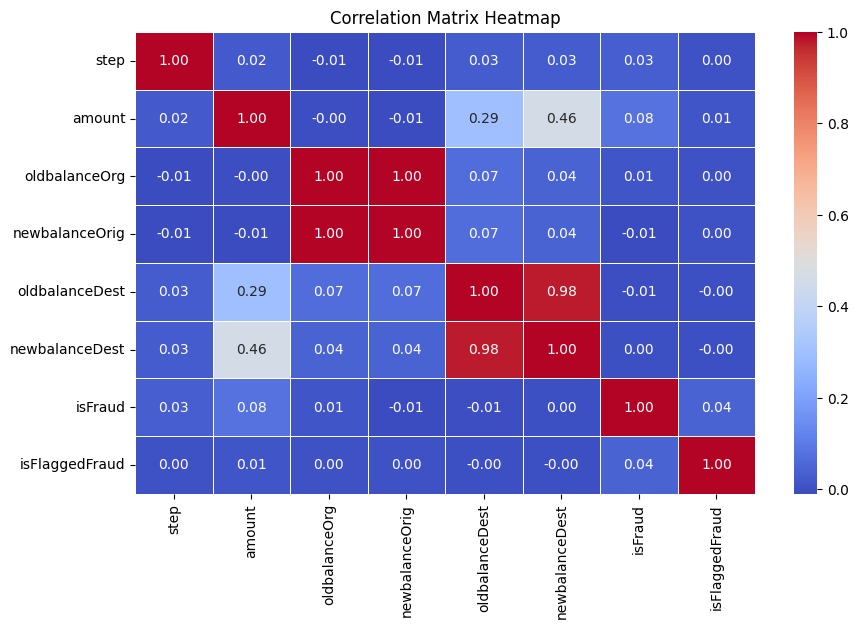

In [44]:

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")

plt.show()


# Identifying Outliers

### Create Box Plots for Numerical Columns

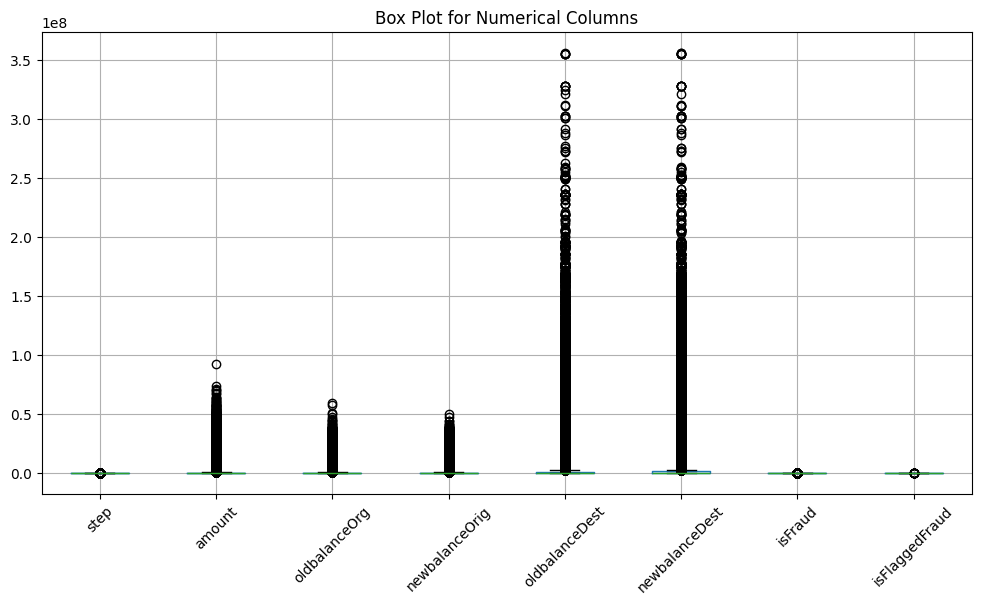

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./fraud_dataset.csv')
df.head()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot(rot=45)
plt.title("Box Plot for Numerical Columns")
plt.show()


### Identify Outliers Using the IQR Method

In [7]:

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # (25%)
    Q3 = data[column].quantile(0.75)  # (75%)
    IQR = Q3 - Q1  # iqr
    lower_bound = Q1 - 1.5 * IQR  # lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper


    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_amount = detect_outliers_iqr(df, 'amount')
print(f"Number of outliers in 'amount': {len(outliers_amount)}")


Number of outliers in 'amount': 338078


### Handle Outliers by removing

In [8]:

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

df_cleaned = remove_outliers_iqr(df, 'amount')
print(f"Data shape before removing outliers: {df.shape}")
print(f"Data shape after removing outliers: {df_cleaned.shape}")


Data shape before removing outliers: (6362620, 11)
Data shape after removing outliers: (6024542, 11)


### Handle Outliers by transforming

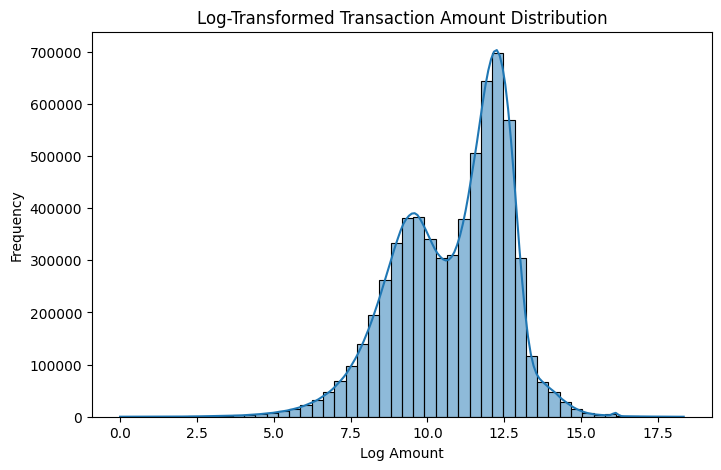

In [9]:
import numpy as np
df['amount_log'] = np.log1p(df['amount'])

plt.figure(figsize=(8, 5))
sns.histplot(df['amount_log'], bins=50, kde=True)
plt.title("Log-Transformed Transaction Amount Distribution")
plt.xlabel("Log Amount")
plt.ylabel("Frequency")
plt.show()


8. Feature Engineering

In [10]:

user_transactions = df.groupby('nameOrig').agg({
    'amount': ['sum', 'mean', 'count'],
    'isFraud': 'sum'
})
user_transactions.columns = ['total_amount', 'average_amount', 'transaction_count', 'fraud_count']
user_transactions.reset_index(inplace=True)

df = df.merge(user_transactions, on='nameOrig', how='left')
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155             0.0             0.0        0               0   
1  M2044282225             0.0             0.0        0               0   
2   C553264065             0.0             0.0        1               0   
3    C38997010         21182.0             0.0        1               0   
4  M1230701703             0.0             0.0        0               0   

   amount_log  total_amount  average_amount  transaction_count  fraud_count  
0    9.194276       

9. Missing Data Handling

In [11]:

df.fillna(df.median(numeric_only=True), inplace=True)
print(df.isnull().sum())


step                 0
type                 0
amount               0
nameOrig             0
oldbalanceOrg        0
newbalanceOrig       0
nameDest             0
oldbalanceDest       0
newbalanceDest       0
isFraud              0
isFlaggedFraud       0
amount_log           0
total_amount         0
average_amount       0
transaction_count    0
fraud_count          0
dtype: int64


10. Hypothesis Testing

In [12]:
from scipy import stats

fraudulent = df[df['isFraud'] == 1]['amount']
legitimate = df[df['isFraud'] == 0]['amount']

t_stat, p_value = stats.ttest_ind(fraudulent, legitimate, equal_var=False)
print(f"T-Test Statistic: {t_stat}, P-Value: {p_value}")


T-Test Statistic: 48.61450320422929, P-Value: 0.0


11. Data Transformation

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
numeric_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT -0.281560  C1231006815      -0.229810       -0.237622   
1     1   PAYMENT -0.294767  C1666544295      -0.281359       -0.285812   
2     1  TRANSFER -0.297555  C1305486145      -0.288654       -0.292442   
3     1  CASH_OUT -0.297555   C840083671      -0.288654       -0.292442   
4     1   PAYMENT -0.278532  C2048537720      -0.274329       -0.282221   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
0  M1979787155       -0.323814       -0.333411        0               0   
1  M2044282225       -0.323814       -0.333411        0               0   
2   C553264065       -0.323814       -0.333411        1               0   
3    C38997010       -0.317582       -0.333411        1               0   
4  M1230701703       -0.323814       -0.333411        0               0   

   amount_log  total_amount  average_amount  transaction_count  fraud_count  
0    9.194276       

12.Dimensionality Reduction

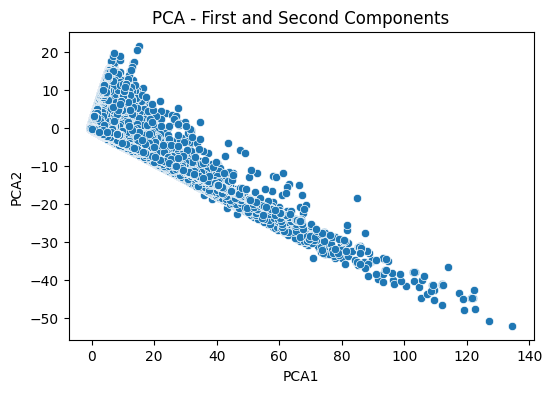

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features = df[numeric_cols]
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

df['PCA1'], df['PCA2'] = pca_components[:, 0], pca_components[:, 1]

plt.figure(figsize=(6, 4))
sns.scatterplot(x='PCA1', y='PCA2', data=df)
plt.title('PCA - First and Second Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


Apriori

# Apriori

In [2]:
import pandas as pd

df = pd.read_csv('fraud_dataset.csv')
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [3]:

df_selected = df[['type', 'amount', 'isFraud']].copy()

df_selected['amount_bin'] = pd.qcut(df_selected['amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

df_selected['isFraud'] = df_selected['isFraud'].astype(str)

print(df_selected.head())

       type    amount isFraud amount_bin
0   PAYMENT   9839.64     0.0        Low
1   PAYMENT   1864.28     0.0        Low
2  TRANSFER    181.00     1.0        Low
3  CASH_OUT    181.00     1.0        Low
4   PAYMENT  11668.14     0.0     Medium


In [4]:

columns_to_keep = ['type', 'amount_bin', 'isFraud']

transactions = df_selected[columns_to_keep].astype(str).values.tolist()

print("🔹 Sample Transactions:", transactions[:5])

🔹 Sample Transactions: [['PAYMENT', 'Low', '0.0'], ['PAYMENT', 'Low', '0.0'], ['TRANSFER', 'Low', '1.0'], ['CASH_OUT', 'Low', '1.0'], ['PAYMENT', 'Medium', '0.0']]


In [5]:
chunk_size = 10000

transactions = []
for chunk in pd.read_csv('fraud_dataset.csv', chunksize=chunk_size):
    chunk['amount_bin'] = pd.qcut(chunk['amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
    chunk['isFraud'] = chunk['isFraud'].astype(str)
    transactions.extend(chunk[['type', 'amount_bin', 'isFraud']].astype(str).values.tolist())

print("🔹 Processed Transactions:", len(transactions))

🔹 Processed Transactions: 4869508


In [6]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions, sparse=True)

df_trans = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)

print("🔹 Encoded Data Shape:", df_trans.shape)

🔹 Encoded Data Shape: (4869508, 11)


<ipython-input-6-6598b70f9f71>:6: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df_trans = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets_apriori = apriori(df_trans, min_support=0.01, use_colnames=True)

rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

print("🔹 Apriori Frequent Itemsets:\n", frequent_itemsets_apriori.head())
print("\n🔹 Apriori Association Rules:\n", rules_apriori.head())

🔹 Apriori Frequent Itemsets:
     support    itemsets
0  0.999207         (0)
1  0.219218   (CASH_IN)
2  0.353970  (CASH_OUT)
3  0.250000      (High)
4  0.250000       (Low)

🔹 Apriori Association Rules:
   antecedents consequents  antecedent support  consequent support   support  \
0         (0)   (CASH_IN)            0.999207            0.219218  0.219218   
1   (CASH_IN)         (0)            0.219218            0.999207  0.219218   
2         (0)      (High)            0.999207            0.250000  0.249840   
3      (High)         (0)            0.250000            0.999207  0.249840   
4         (0)       (Low)            0.999207            0.250000  0.249970   

   confidence      lift  representativity  leverage  conviction  \
0    0.219392  1.000794               1.0  0.000174    1.000223   
1    1.000000  1.000794               1.0  0.000174         inf   
2    0.250038  1.000154               1.0  0.000038    1.000051   
3    0.999360  1.000154               1.0  0.000038 

# FP growth

In [8]:
from mlxtend.frequent_patterns import fpgrowth

# Run FP-Growth
frequent_itemsets_fpgrowth = fpgrowth(df_trans, min_support=0.05, use_colnames=True)

# Generate rules
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)

print("🔹 FP-Growth Frequent Itemsets:\n", frequent_itemsets_fpgrowth.head())
print("\n🔹 FP-Growth Association Rules:\n", rules_fpgrowth.head())

🔹 FP-Growth Frequent Itemsets:
     support    itemsets
0  0.999207         (0)
1  0.337563   (PAYMENT)
2  0.250000    (Medium)
3  0.250000       (Low)
4  0.082953  (TRANSFER)

🔹 FP-Growth Association Rules:
   antecedents consequents  antecedent support  consequent support   support  \
0         (0)   (PAYMENT)            0.999207            0.337563  0.337563   
1   (PAYMENT)         (0)            0.337563            0.999207  0.337563   
2    (Medium)         (0)            0.250000            0.999207  0.249924   
3         (0)    (Medium)            0.999207            0.250000  0.249924   
4    (Medium)   (PAYMENT)            0.250000            0.337563  0.116935   

   confidence      lift  representativity  leverage  conviction  \
0    0.337831  1.000794               1.0  0.000268    1.000405   
1    1.000000  1.000794               1.0  0.000268         inf   
2    0.999699  1.000492               1.0  0.000123    2.631469   
3    0.250123  1.000492               1.0  0.000

#  Naive Bayes

In [9]:
import pandas as pd
df = pd.read_csv('./fraud_dataset.csv')
df.head()
df = df.dropna()

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

X = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9927
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.03      0.16      0.05      1620

    accuracy                           0.99   1272524
   macro avg       0.52      0.58      0.53   1272524
weighted avg       1.00      0.99      1.00   1272524



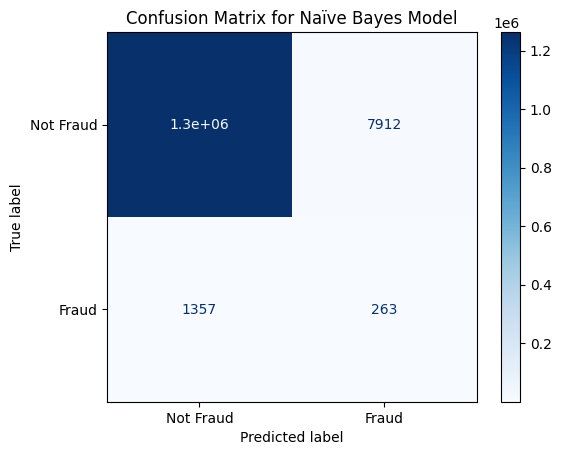

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Naïve Bayes Model")
plt.show()

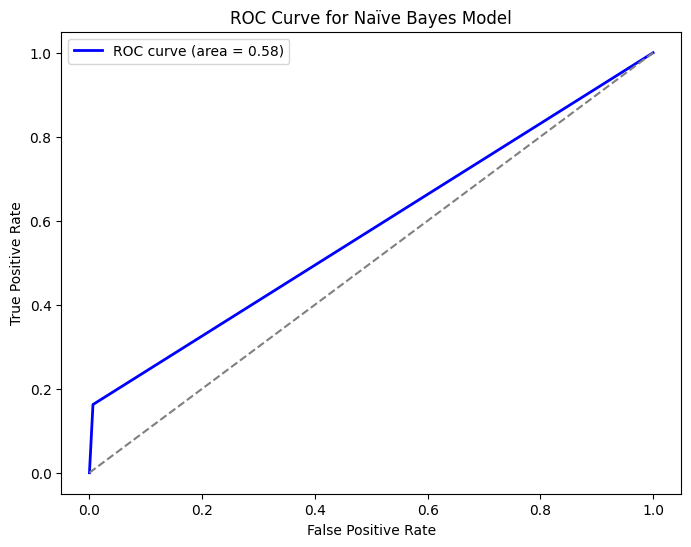

In [12]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Naïve Bayes Model")
plt.legend()
plt.show()

# Random Forest ID3

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

X = df.drop(columns=['isFraud', 'isFlaggedFraud'])
y = df['isFraud']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(5090096, 9) (5090096,)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
id3_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

id3_tree.fit(X_train, y_train)
y_pred = id3_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.97      0.61      0.75      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.80      0.87   1272524
weighted avg       1.00      1.00      1.00   1272524



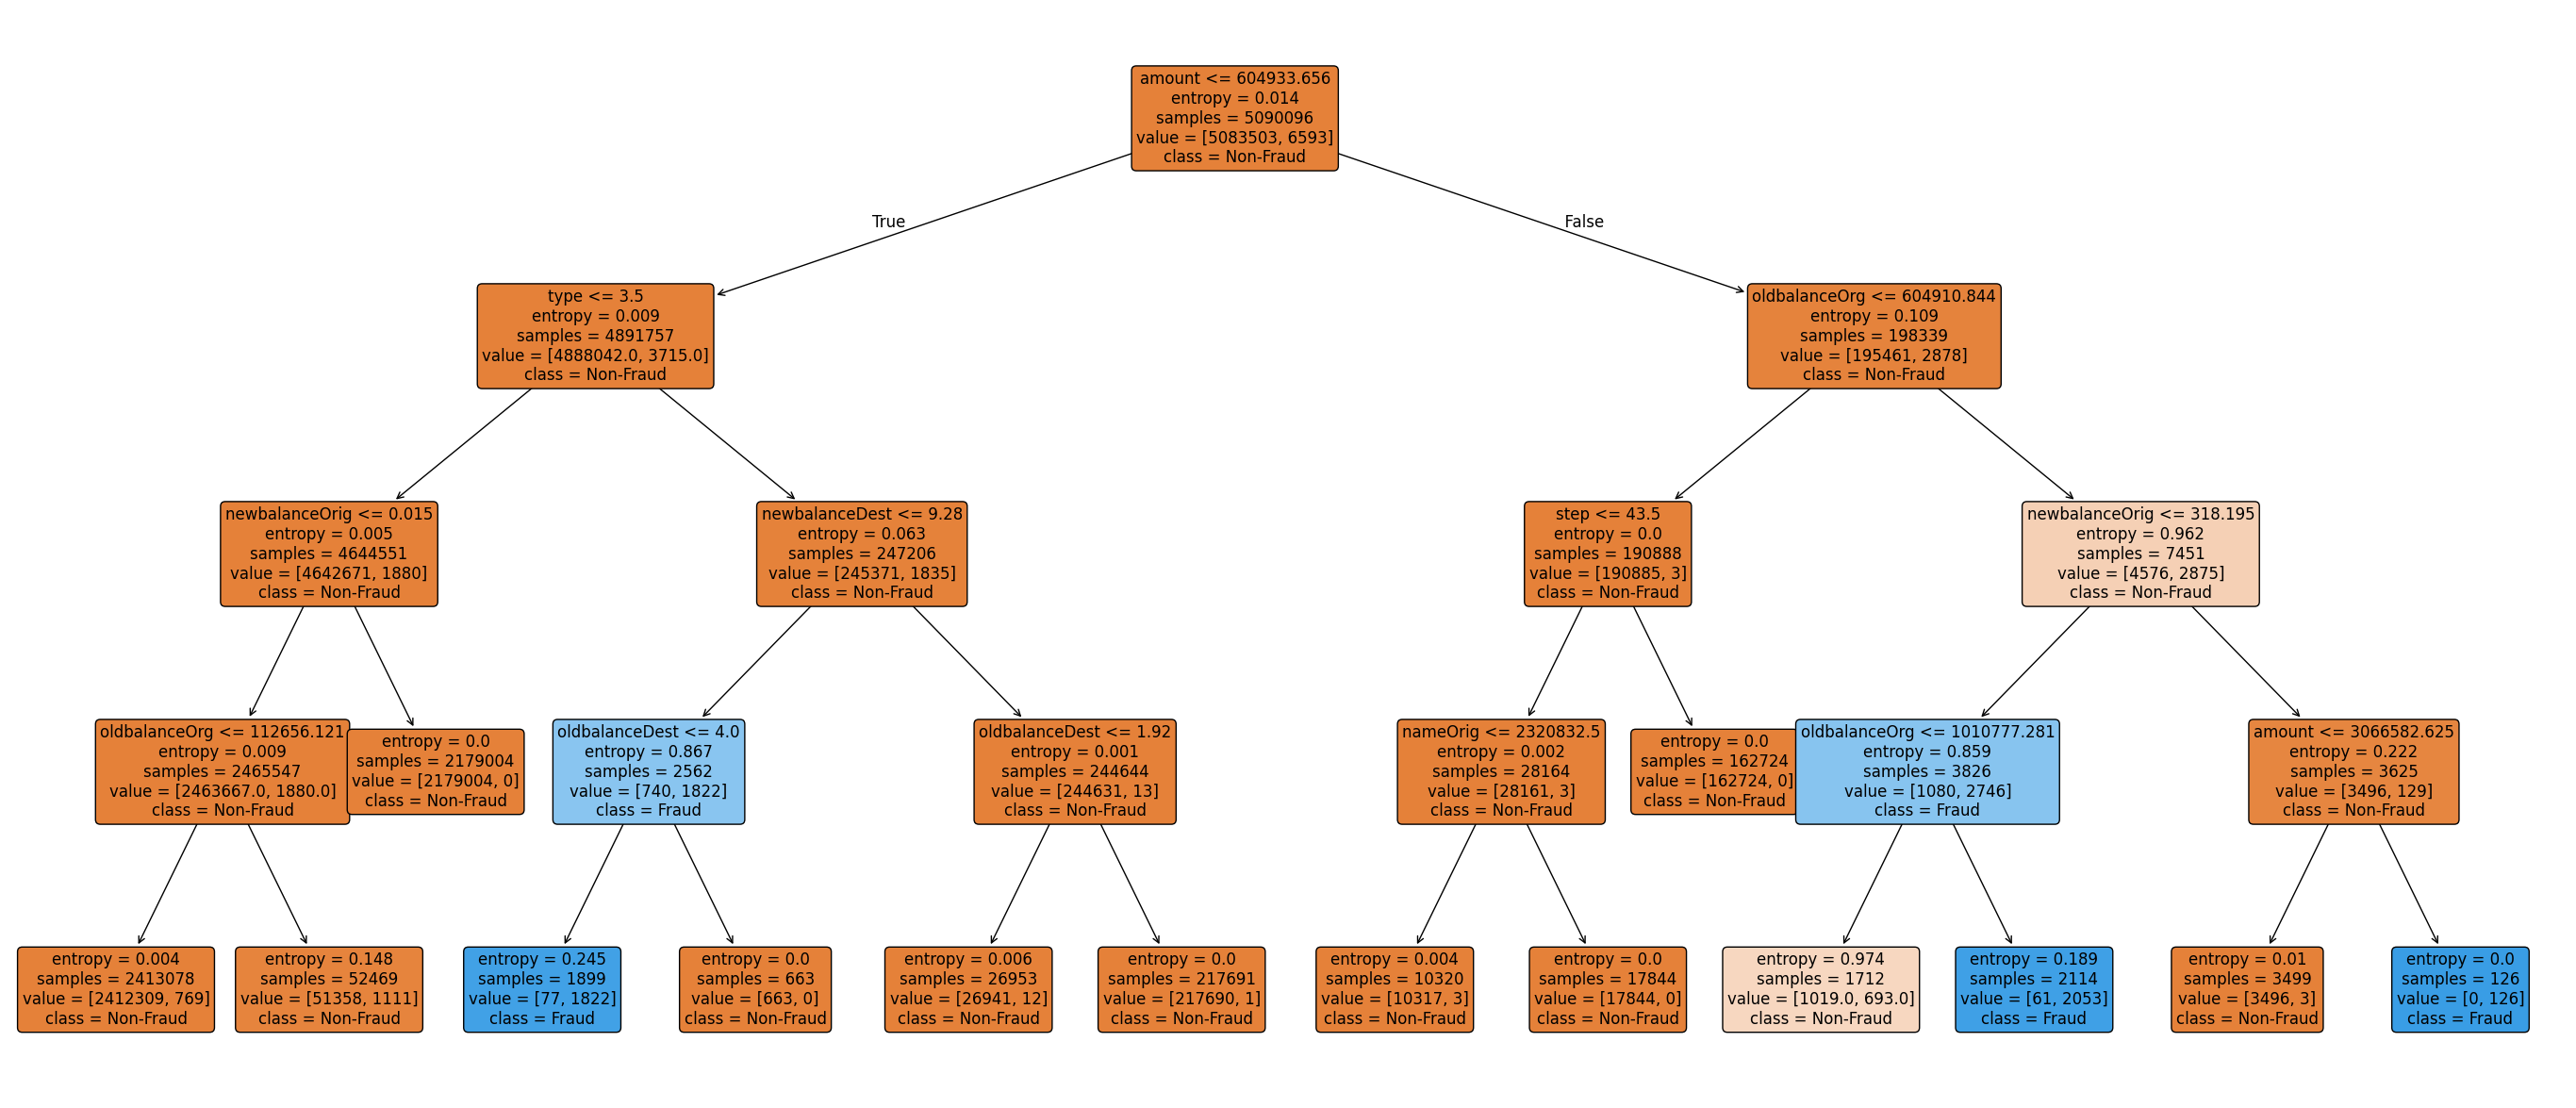

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(35,15))
plot_tree(id3_tree,
          filled=True,
          feature_names=X.columns,
          class_names=['Non-Fraud', 'Fraud'],
          rounded=True,
          fontsize=12)
plt.show()

# K means


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

X = df.drop(columns=['isFraud', 'isFlaggedFraud'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[-1.70304158  0.95239932 -0.28155992 -1.31882479 -0.22981004 -0.2376217
   1.22048984 -0.3238139  -0.33341141]
 [-1.70304158  0.95239932 -0.29476726 -0.53851997 -0.28135938 -0.2858123
   1.31623184 -0.3238139  -0.33341141]
 [-1.70304158  1.69307616 -0.2975548  -1.18563042 -0.28865378 -0.29244171
  -0.40885558 -0.3238139  -0.33341141]
 [-1.70304158 -0.52895436 -0.2975548   1.44574227 -0.28865378 -0.29244171
  -0.47281998 -0.31758239 -0.33341141]
 [-1.70304158  0.95239932 -0.27853189  0.14683396 -0.27432915 -0.28222099
   0.10995329 -0.3238139  -0.33341141]]


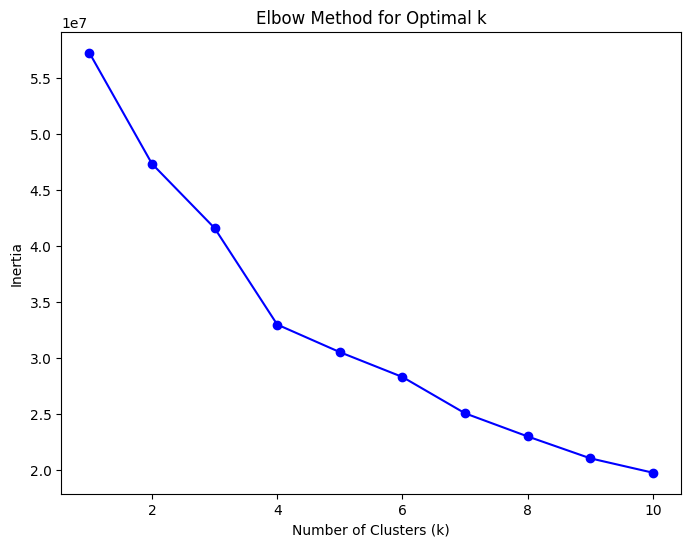

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [20]:

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df['Cluster'] = y_kmeans

print(df.head())

   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     3   9839.64    757869       170136.0       160296.36   1662094   
1     1     3   1864.28   2188998        21249.0        19384.72   1733924   
2     1     4    181.00   1002156          181.0            0.00    439685   
3     1     1    181.00   5828262          181.0            0.00    391696   
4     1     3  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  Cluster  
0             0.0             0.0        0               0        1  
1             0.0             0.0        0               0        1  
2             0.0             0.0        1               0        1  
3         21182.0             0.0        1               0        0  
4             0.0             0.0        0               0        1  


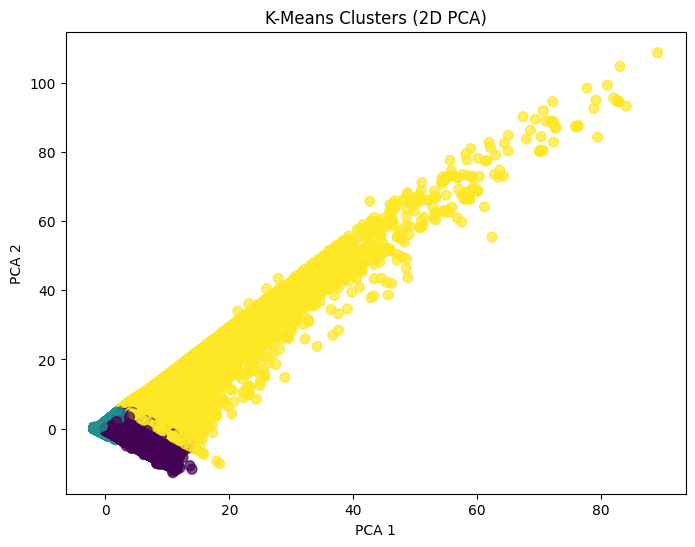

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.title("K-Means Clusters (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
